Problem Statement:

Objective:

 You are given two images of the same scene taken from different angles or positions. The goal is to:

Align these images by performing geometric transformations, including translation, scaling, and rotation.

Use Affine transformation to align the images properly.

Use Image Registration techniques to match the key features and align both images correctly.

After the alignment, create a panorama (combining both images).

Practical Solution:

In this practical, we will:

Load two images of the same scene taken from different angles.

Perform key point detection and matching between the two images using SIFT (Scale-Invariant Feature Transform).

Estimate the affine transformation matrix to align both images.

Apply the transformation to one image to align it with the other.

Combine the aligned images into a panorama.

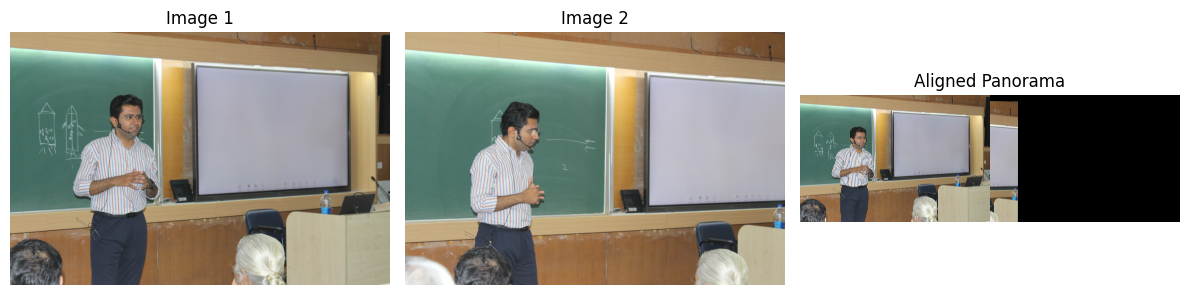

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the two images
image1 = cv2.imread('IMG_3931.JPG')  # Replace with the path to your image 1
image2 = cv2.imread('IMG_3933.JPG')  # Replace with the path to your image 2

# Convert the images to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Step 2: Detect keypoints and descriptors using SIFT
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# Step 3: Match descriptors using a FLANN-based matcher
flann = cv2.FlannBasedMatcher(dict(algorithm=1, trees=10), dict())
matches = flann.knnMatch(des1, des2, k=2)

# Step 4: Apply Lowe's ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# Step 5: Get the matched keypoints from both images
pts1 = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
pts2 = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Step 6: Calculate the affine transformation matrix
M, mask = cv2.estimateAffine2D(pts1, pts2)

# Step 7: Apply the affine transformation to image2
aligned_image2 = cv2.warpAffine(image2, M, (image1.shape[1] + image2.shape[1], image1.shape[0]))

# Step 8: Combine both images into a panorama
panorama = np.copy(aligned_image2)
panorama[0:image1.shape[0], 0:image1.shape[1]] = image1

# Step 9: Display the results
plt.figure(figsize=(12, 6))

# Show the original images and the aligned panorama
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title("Image 1")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title("Image 2")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB))
plt.title("Aligned Panorama")
plt.axis('off')

plt.tight_layout()
plt.show()


Code Explanation:

Load Images:

We load two images (image1.jpg and image2.jpg) that are taken from different viewpoints of the same scene.

Convert the images to grayscale using cv2.cvtColor(), as key point detection and feature matching work better on grayscale images.

Feature Detection (SIFT):

SIFT (Scale-Invariant Feature Transform) is used to detect and compute keypoints and descriptors in both images. The cv2.SIFT_create() function creates a SIFT object, and detectAndCompute() is used to find keypoints and descriptors.

Descriptor Matching:

We use a FLANN-based matcher (Fast Library for Approximate Nearest Neighbors) to match the descriptors from both images.

The flann.knnMatch() method is used to find the best matches between descriptors from both images.

Lowe’s Ratio Test:


Lowe’s ratio test is used to filter out weak matches. This test checks the ratio of the distances between the best and second-best matches. If the ratio is less than 0.7, it is considered a good match.

Affine Transformation Calculation:

Once we have the matched keypoints, we use cv2.estimateAffine2D() to compute the affine transformation matrix. This matrix describes the transformation that aligns one image with the other. Affine transformations include translation, scaling, and rotation.

Warping the Image:

The computed affine transformation matrix M is used to transform (align) image2 to the same perspective as image1 using cv2.warpAffine().

Create Panorama:

The aligned image (aligned_image2) is placed on the right side of image1 to create a panorama.

We use NumPy slicing to combine the two images.

Display the Images:

We display the original images and the final aligned panorama using matplotlib for visualization.

Expected Output:

Original Images:

The first and second images taken from different angles.

Aligned Panorama:

The images aligned side by side, showing a combined view of the two images into a single panorama.

Conclusion:

Geometric transformations such as scaling, translation, and rotation are essential for aligning images, especially when the images are taken from different viewpoints.

Affine transformation allows for an accurate alignment of images, preserving parallelism and straight lines.

Image registration techniques, including feature matching and affine transformation, are useful for tasks like panorama stitching, where multiple images must be aligned into one cohesive image.

This practical demonstrates how to perform geometric transformations and image registration to combine two images into a panorama, which is an essential task in computer vision and image processing.